<a href="https://colab.research.google.com/github/shaik-imtiyaz/2216142-AI_ML_-BOOTCAMP/blob/main/K_MEANS_Mallcustomers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#read dataset
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Mall_Customers.csv")

In [2]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#default axis = 0 which is rows, axis =1 which is columns
df = df.drop(['CustomerID'],axis=1)

In [4]:
#NULL values
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

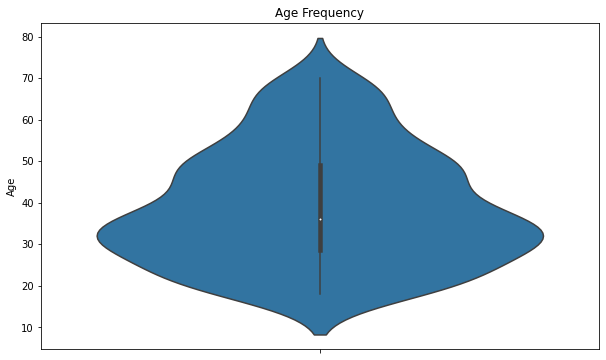

In [5]:
#Visualize the distribution
#plot the age frequency of customers - violin plot

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
plt.title('Age Frequency')
sns.violinplot(y=df["Age"])
plt.show()


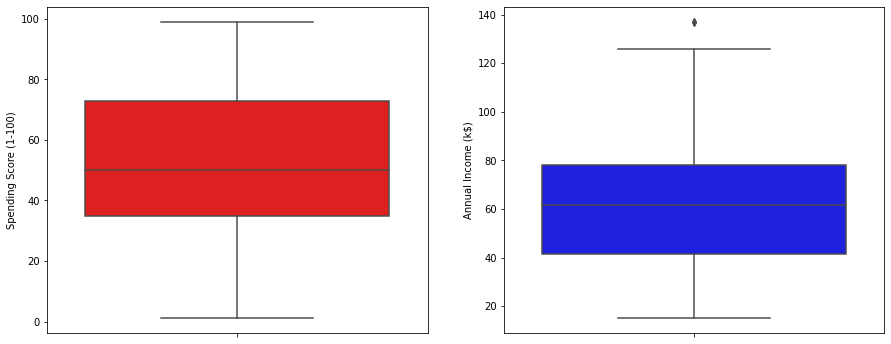

In [6]:
#box plot - of spending score and annual income to better visualize the distribution range
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df["Spending Score (1-100)"],color="red")
plt.subplot(1,2,2)
sns.boxplot(y=df["Annual Income (k$)"],color="blue")
plt.show()

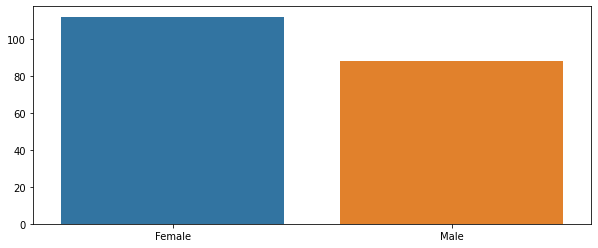

In [7]:
genders=df.Gender.value_counts()
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index,y=genders.values)  #index={Female,Male} - xaxis, genders = {age values} - yaxis
plt.show()

In [8]:
df["Age"]

0      19
1      21
2      20
3      23
4      31
       ..
195    35
196    45
197    32
198    32
199    30
Name: Age, Length: 200, dtype: int64

I want to filter the dataframe with & condition to keep rows with a particular column values

In [9]:
'''Syntax: dataframe[(dataframe['Age'] == 22) & 
          dataframe['Stream'].isin(options)] '''

"Syntax: dataframe[(dataframe['Age'] == 22) & \n          dataframe['Stream'].isin(options)] "

In [10]:
#df['Age'][(df["Age"]>=18) & (df["Age"]<=25)]

In [11]:
#make a bar plot to check the distribution of number of customers in each group

age18_25 = df['Age'][(df["Age"]>=18) & (df["Age"]<=25)]
age26_35 = df['Age'][(df["Age"]>=26) & (df["Age"]<=35)]
age36_45 = df['Age'][(df["Age"]>=36) & (df["Age"]<=45)]
age46_55 = df['Age'][(df["Age"]>=46) & (df["Age"]<=55)]
age55above = df['Age'][(df["Age"]>=55)]

In [12]:
len(age18_25)

38

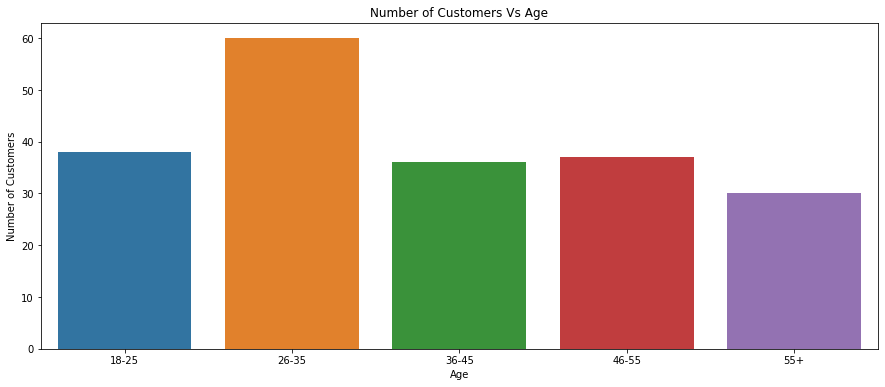

In [13]:
x=["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25),len(age26_35),len(age36_45),len(age46_55),len(age55above)]

plt.figure(figsize=(15,6))
sns.barplot(x=x,y=y)
plt.title("Number of Customers Vs Age")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [15]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [16]:
#lets visualize the number of customers according to their Spending scores

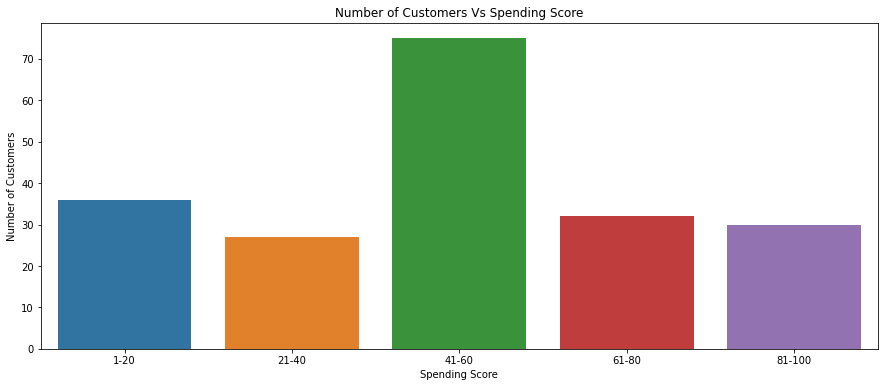

In [17]:
ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=1)&(df["Spending Score (1-100)"]<=20)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=21)&(df["Spending Score (1-100)"]<=40)]
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=41)&(df["Spending Score (1-100)"]<=60)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=61)&(df["Spending Score (1-100)"]<=80)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=81)&(df["Spending Score (1-100)"]<=100)]


x=["1-20","21-40","41-60","61-80","81-100"]
y = [len(ss1_20),len(ss21_40),len(ss41_60),len(ss61_80),len(ss81_100)]

plt.figure(figsize=(15,6))
sns.barplot(x=x,y=y)
plt.title("Number of Customers Vs Spending Score")
plt.xlabel("Spending Score")
plt.ylabel("Number of Customers")
plt.show()


#SYNOPSIS: Majority of the Customers have spending score in range of 41-60

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


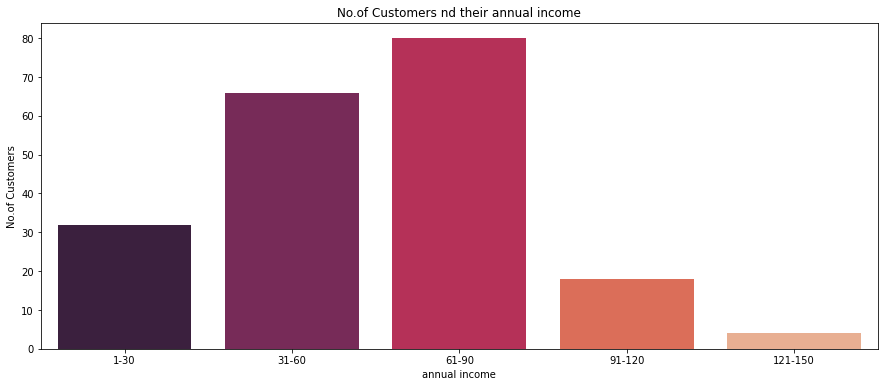

In [18]:
#lets visualize the number of customers according to their Annual Incomes

ai1_30 =df["Annual Income (k$)"][(df["Annual Income (k$)"]>=1)&(df["Annual Income (k$)"]<=30)]

ai31_60 =df["Annual Income (k$)"][(df["Annual Income (k$)"]>=31)&(df["Annual Income (k$)"]<=60)]

ai61_90 =df["Annual Income (k$)"][(df["Annual Income (k$)"]>=61)&(df["Annual Income (k$)"]<=90)]

ai91_120=df["Annual Income (k$)"][(df["Annual Income (k$)"]>=91)&(df["Annual Income (k$)"]<=120)]

ai121_150 =df["Annual Income (k$)"][(df["Annual Income (k$)"]>=121)&(df["Annual Income (k$)"]<=150)]


x=["1-30","31-60","61-90","91-120","121-150"]

y=[len(ai1_30),len(ai31_60 ),len(ai61_90),len(ai91_120),len(ai121_150)]

plt.figure(figsize=(15,6))

sns.barplot(x,y,palette="rocket")

plt.title("No.of Customers nd their annual income")

plt.xlabel("annual income")

plt.ylabel("No.of Customers")

plt.show()


#SYNOPSIS: The majority of customers have annual income in the range of 60k$ - 90k$

In [19]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [20]:
''' Supervised Algo
from sklearn.  import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
#Training phase


y_pred=model.predict(X_test)
[y_pred y_test]'''

' Supervised Algo\nfrom sklearn.  import LogisticRegression\nmodel = LogisticRegression()\nmodel.fit(X_train,Y_train)\n#Training phase\n\n\ny_pred=model.predict(X_test)\n[y_pred y_test]'

In [21]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [22]:
df.iloc[:,-3:]

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [23]:
'''Unsupervised'''
from sklearn.cluster import KMeans
#Train our model
km =KMeans(n_clusters=2)
clusters=km.fit_predict(df.iloc[:,-3:])

In [24]:
df["label"] = clusters

In [25]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,Male,19,15,39,0
1,Male,21,15,81,1
2,Female,20,16,6,0
3,Female,23,16,77,1
4,Female,31,17,40,0
...,...,...,...,...,...
195,Female,35,120,79,1
196,Female,45,126,28,0
197,Male,32,126,74,1
198,Male,32,137,18,0


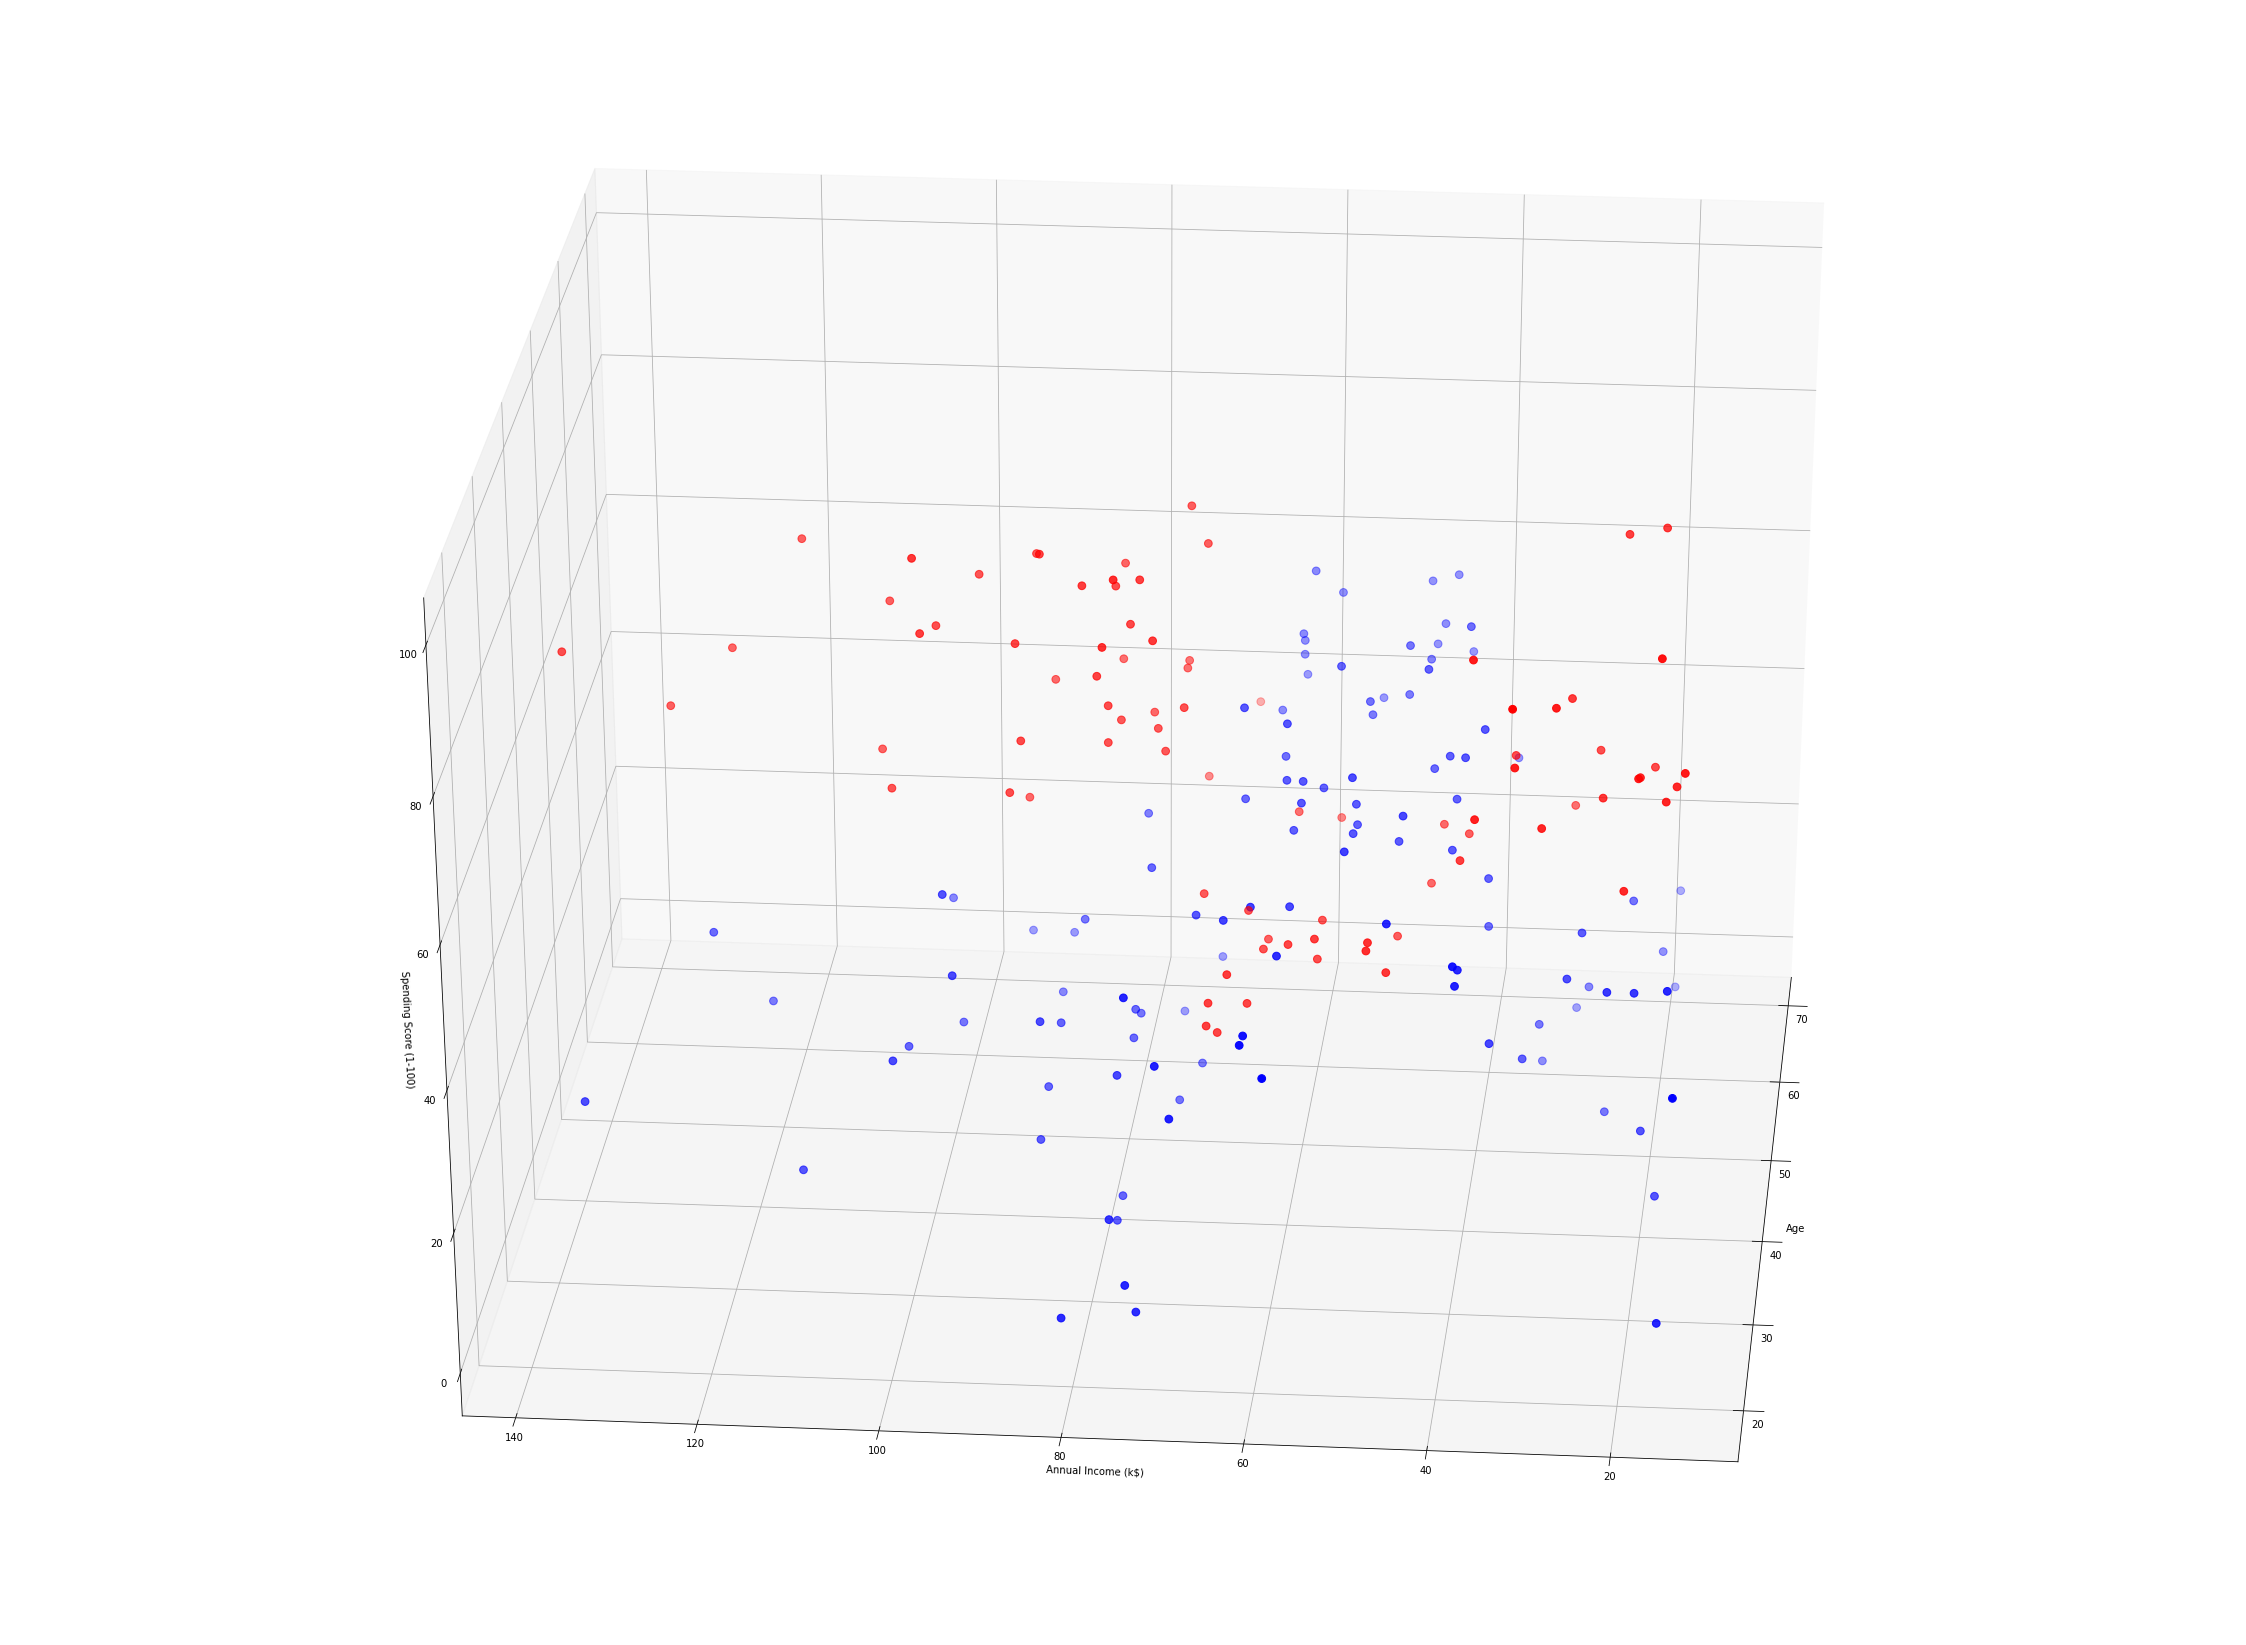

In [26]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(40,30))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)

ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

#SYNOPSIS: We didn't get the perfect Clusters - Variance (Error) is not minimized

I plotted Within Cluster Sum Of Squares (WCSS) against the the number of clusters (K Value) to figure out the optimal number of clusters value. WCSS measures sum of 
                                         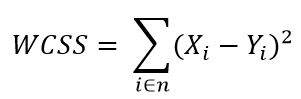
 distances of observations from their cluster centroids which is given by the below formula. image.png

where Yi is centroid for observation Xi. The main goal is to maximize number of clusters and in limiting case each data point becomes its own cluster centroid.

The Elbow Method

Calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k, and choose the k for which WSS first starts to diminish. In the plot of WSS-versus k, this is visible as an elbow.

The steps can be summarized in the below steps:

1)Compute K-Means clustering for different values of K by varying K from 1 to 10 clusters.

2)For each K, calculate the total within-cluster sum of square (WCSS).

3)Plot the curve of WCSS vs the number of clusters K.

4)The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.                                        

[270030.15499999997, 181714.26550620247, 106377.16981007869, 73704.62903948833, 44465.344336822585, 37282.75409373235, 30276.272591900863, 25080.048574288718, 21844.45568307662, 19658.975596496522]


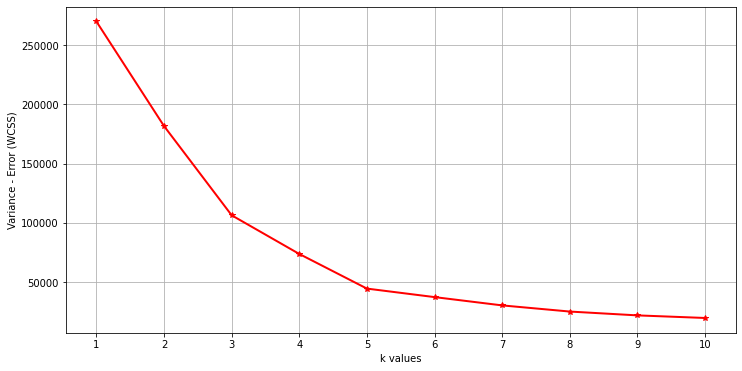

In [27]:
#Elbow point - To find the optimal k value
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k,init="k-means++")
  kmeans.fit(df.iloc[:,-3:])
  wcss.append(kmeans.inertia_)

print(wcss)

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="*")
plt.xlabel("k values")
plt.xticks(np.arange(1,11,1))
plt.ylabel("Variance - Error (WCSS)")
plt.show()

#SYNOPSIS: The optimal k cluster value is 5

In [28]:
from sklearn.cluster import KMeans
#Train our model
km =KMeans(n_clusters=5)
clusters=km.fit_predict(df.iloc[:,-3:])

In [29]:
df["label"] = clusters

In [30]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,Male,19,15,39,2
1,Male,21,15,81,1
2,Female,20,16,6,2
3,Female,23,16,77,1
4,Female,31,17,40,2
...,...,...,...,...,...
195,Female,35,120,79,3
196,Female,45,126,28,0
197,Male,32,126,74,3
198,Male,32,137,18,0


I wanted to make a 3D plot to visualize the spending scores of customers with their annual income., age. - to see clustered points

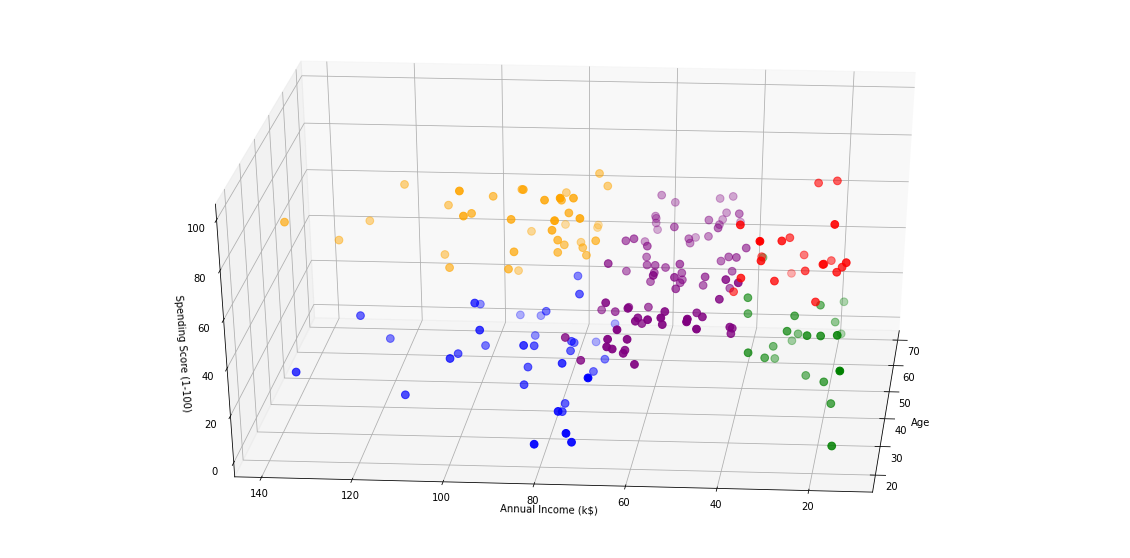

In [31]:
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

 

fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)

ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)

ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)

ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)

ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)

ax.view_init(30, 185)

plt.xlabel("Age")

plt.ylabel("Annual Income (k$)")

ax.set_zlabel('Spending Score (1-100)')

plt.show()

In [32]:
#User -   Predicting the Cluster of new customer - membership card
age = int(input("Enter Age:"))
anual_income = int(input("Enter Annual Income of customer: "))
spend_score = int(input("Enter Spending Score:"))
res_cluster = km.predict([[age,anual_income,spend_score]])

Enter Age:26
Enter Annual Income of customer: 25000
Enter Spending Score:20000


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


In [33]:
print("new Customer belongs to Cluster: ",res_cluster[0])

new Customer belongs to Cluster:  3
